# Simulating Planetary Orbits


The provided Python code simulates the gravitational interactions between three celestial bodies: the Sun, Earth, and Venus. The theoretical approach used in this code is based on Newton's Law of Universal Gravitation and classical mechanics. Specifically, it employs the principles of gravitational attraction and motion to calculate the positions and velocities of the celestial bodies over time.

### Newton's Law of Universal Gravitation
This law states that every mass attracts every other mass in the universe with a force that is directly proportional to the product of their masses and inversely proportional to the square of the distance between their centers. The force, $F$, between two bodies can be expressed as:

$F = G \frac{m_1m_2}{d^2}$

where:
- $F$ is the force (Newtons)
- $G$ is the gravitational constant (SI Units: $6.67428 \times 10^{-11} N(m/kg)^2$)
- ${m_1}$ and ${m_2}$ are the masses of the two objects (kilograms)
- $d$ is the distance between the two objects (meters)

Using this equation, Newton determined a formula for calculating how long it took an object to complete an orbit around a central mass. However, when dealing with three or more objects, it’s generally not possible to find a tidy formula to calculate what the three bodies will do.

Instead, such problems are tackled by numeric integration, a brute-force approach where you take all the object positions and velocities at time T, calculate the forces they exert on each other, update the velocities, and calculate the new positions at time T+\epsilon. Then you repeat this in a loop, stepping forward through time, and output or plot the results.

### Classical Mechanics
The simulation uses basic principles of motion to update the positions and velocities of the bodies over time based on the gravitational forces calculated from the previous step. The motion is computed using the equations:

$v=v+a⋅Δt$

$p=p+v⋅Δt$

where:
- $v$ is velocity
- $a$ is acceleration (derived from force/mass)
- $p$ is position
- $Δt$ is the time step

# Approach

To implement this in Python, we’ll create a `Body` class that will have additional attributes:

- $m$ is mass for the object’s mass
- $v_x$ and $v_y$ are for its velocity
- $p_x$ and $p_y$ are for its position.

Note that the `Body` class accounts for attraction, which will take another Body instance and return the $x$ and $y$ components of the force exerted by the other body. We will also provide a graphical display of the results.

The system described in the code consists of the Sun, Earth, and Venus, so three `Body` instances are created for each body.

The time step chosen is one day, which particularly works well for our Sun, Earth, and Venus example. When you run the program, you can see how long it takes for the plot to complete an entire orbit. For Earth it’s the expected 365 days, and for Venus it’s 224 days.

# Solution

In [53]:
# Import Packages
!pip install matplotlib numpy
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [55]:
# The gravitational constant G
G = 6.67428e-11

# Assumed scale: 100 pixels = 1AU.
AU = (149.6e6 * 1000)     # 149.6 million km, in meters.
SCALE = 250 / AU

In [56]:
class Body:
    """A class representing a planetary body with mass, position, and velocity."""
    def __init__(self, name, mass, px, py, vx, vy, color):
        self.name = name
        self.mass = mass
        self.px = px
        self.py = py
        self.vx = vx
        self.vy = vy
        self.color = color
        self.positions = []  # Store positions over time for plotting.

    def attraction(self, other):
        """Calculate the force components exerted by another body."""
        dx = other.px - self.px
        dy = other.py - self.py
        d = math.sqrt(dx**2 + dy**2)

        if d == 0:
            raise ValueError(f"Collision detected between {self.name} and {other.name}!")

        force = G * self.mass * other.mass / d**2
        theta = math.atan2(dy, dx)
        fx = math.cos(theta) * force
        fy = math.sin(theta) * force
        return fx, fy

def update_velocities_and_positions(bodies, timestep):
    """Update velocities and positions of all bodies over one timestep."""
    forces = {body: (0.0, 0.0) for body in bodies}

    # Calculate net forces on each body.
    for body in bodies:
        for other in bodies:
            if body is not other:
                fx, fy = body.attraction(other)
                forces[body] = (forces[body][0] + fx, forces[body][1] + fy)

    # Update velocities and positions based on forces.
    for body in bodies:
        fx, fy = forces[body]
        body.vx += fx / body.mass * timestep
        body.vy += fy / body.mass * timestep

        body.px += body.vx * timestep
        body.py += body.vy * timestep

        # Store the new position for plotting.
        body.positions.append((body.px * SCALE, body.py * SCALE))

def simulate(bodies, days):
    """Run the simulation for a specified number of days."""
    timestep = 86400  # seconds in a day
    for day in range(days):
        update_velocities_and_positions(bodies, timestep)

In [57]:
# Create planetary bodies
sun = Body('Sun', 1.98892e30, 0, 0, 0, 0, 'yellow')
earth = Body('Earth', 5.9742e24, -1 * AU, 0, 0, 29.783e3, 'blue')
venus = Body('Venus', 4.8685e24, 0.723 * AU, 0, 0, -35.02e3, 'red')
# Venus parameters taken from
# http://nssdc.gsfc.nasa.gov/planetary/factsheet/venusfact.html

In [58]:
# Run the simulation for 365 days.
simulate([sun, earth, venus], days=365)

<ipython-input-59-a0be3a32effb>:15: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  sun_dot.set_data(sun.positions[frame][0], sun.positions[frame][1])
<ipython-input-59-a0be3a32effb>:16: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  earth_dot.set_data(earth.positions[frame][0], earth.positions[frame][1])
<ipython-input-59-a0be3a32effb>:17: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  venus_dot.set_data(venus.positions[frame][0], venus.positions[frame][1])


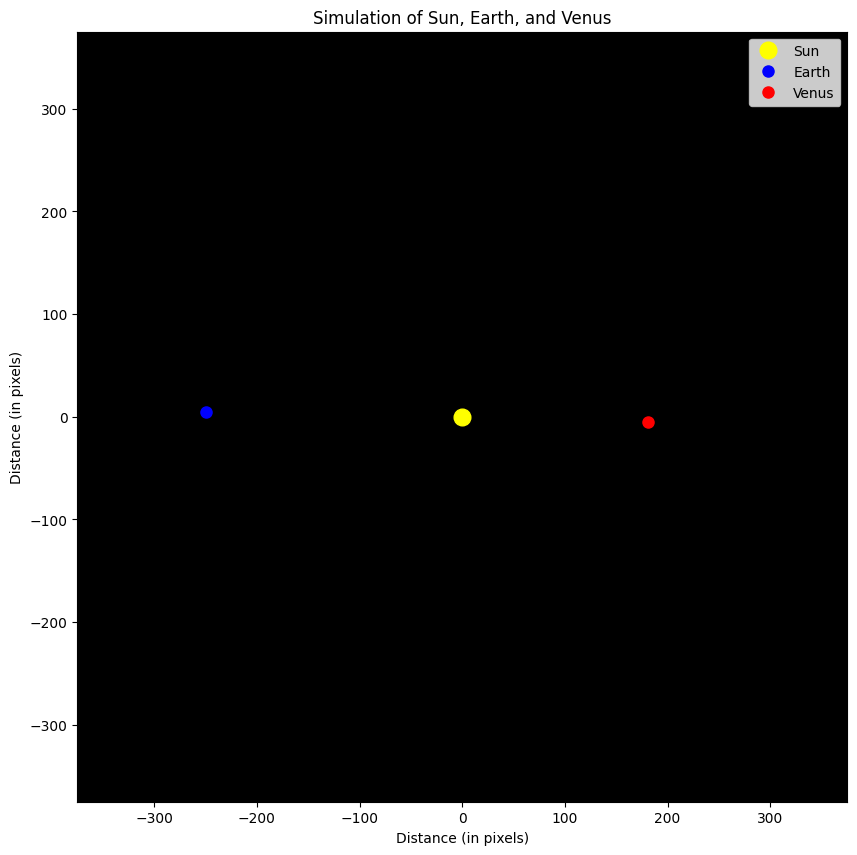

In [59]:
# Set up the plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(-1.5 * SCALE * AU, 1.5 * SCALE * AU)
ax.set_ylim(-1.5 * SCALE * AU, 1.5 * SCALE * AU)
ax.set_aspect('equal')
ax.set_facecolor('black')

# Plot the initial positions of the bodies
sun_dot, = ax.plot([], [], 'o', color=sun.color, markersize=12, label=sun.name)
earth_dot, = ax.plot([], [], 'o', color=earth.color, markersize=8, label=earth.name)
venus_dot, = ax.plot([], [], 'o', color=venus.color, markersize=8, label=venus.name)

# Animation update function
def update(frame):
    sun_dot.set_data(sun.positions[frame][0], sun.positions[frame][1])
    earth_dot.set_data(earth.positions[frame][0], earth.positions[frame][1])
    venus_dot.set_data(venus.positions[frame][0], venus.positions[frame][1])
    return sun_dot, earth_dot, venus_dot

# Create an animation
ani = animation.FuncAnimation(fig, update, frames=len(sun.positions), interval=50, blit=True)

# Show the plot
plt.title('Simulation of Sun, Earth, and Venus')
plt.xlabel('Distance (in pixels)')
plt.ylabel('Distance (in pixels)')
plt.legend()
plt.show()

# Code Discussion

### 1. Imports and Constants
The code begins by importing the necessary packages, including math, numpy, and matplotlib for mathematical operations and plotting.
It defines the gravitational constant $G$ and a scaling factor to convert astronomical units (AU) into pixels for visualization.

### 2. Body Class
A Body class is created to represent a celestial body, with attributes for its name, mass, position ($p_x$, $p_y$), velocity ($v_x$, $v_y$), and color for plotting.
The attraction method calculates the gravitational force exerted by another body. It computes the distance and direction to the other body, and then calculates the force components $f_x$ and $f_y$.

### 3. Updating Velocities and Positions
The update_velocities_and_positions function computes the net gravitational forces acting on each body from all other bodies.
For each body, the function updates its velocity based on the net force (using
$F=ma$) and then updates its position based on this velocity.

### 4. Simulation Function
The simulate function runs the simulation for a specified number of days. It employs a time step of one day (86400 seconds) to update the positions and velocities of the bodies iteratively.

### 5. Creating Celestial Bodies
The Sun, Earth, and Venus are instantiated as Body objects with their respective masses, initial positions, and velocities.

### 6. Plotting Setup
A plot is set up using matplotlib to visualize the simulation. The axis limits are scaled to fit the simulation, and the background color is set to black for better visibility of the celestial bodies.

### 7. Animation
An animation function is defined to update the plot frame-by-frame, reflecting the positions of the Sun, Earth, and Venus over time.
The FuncAnimation from matplotlib creates a dynamic visualization of the simulation, showing how the positions of the bodies change with respect to each other over the specified time.

### 8. Execution
Finally, the simulation is executed for 365 days, and the resulting animation is displayed with titles and labels to enhance user understanding.

### Summary
This code is an implementation of a simple n-body simulation that demonstrates the gravitational interactions of celestial bodies. It provides a visual representation of the orbits of the Sun, Earth, and Venus based on Newtonian mechanics. The approach highlights the fundamental principles of gravity and motion, allowing for an educational exploration of celestial mechanics.

# Learned Lessons

Each simulation step requires calculating $N * (N-1)$ distances and attractions, so the time complexity is $O(N^2)$. On a laptop or desktop, the display will be visible changing up to around 20 objects. More efficient coding would let us handle more objects; we could rewrite the calculations in C or parallelize the code to divide the work in each step among multiple threads or CPUs. You could also adjust the timestep dynamically: if objects are far apart, a larger timestep would introduce less error, and the timestep could be shortened when objects are interacting more closely.

These techniques would increase our practical limit to hundreds $(10^3)$ or thousands $(10^4)$ of objects, but this means we can’t simulate even a small galaxy, which might contain tens of millions of stars $(10^7)$. (Our galaxy is estimated to have around 200 billion stars, $2 \times 10^{11}$.) Entirely different approaches need to be taken for that problem size; for example, the attraction of distant particles is approximated and only nearby particles are calculated exactly. The references include a survey by Drs. Trenti and Hut that describes the techniques used for larger simulations.

# References

- http://www.scholarpedia.org/article/N-body_simulations This survey, by Dr. Michele Trenti and Dr. Piet Hut, describes how the serious scientific N-body simulators work, using trees to approximate the attraction at great distances. Such programs are able to run in O(N log(N)) time.
- http://ssd.jpl.nasa.gov/horizons.cgi NASA’s Jet Propulsion Laboratory provides a system called HORIZONS that returns accurate positions and velocities for objects within the solar system. In the example code, the values used are only rough approximations; the orbital distances and planet velocities are set to the mean distances and their relative positions don’t correspond to any actual point in time – but they produce reasonable output.
- https://fiftyexamples.readthedocs.io/en/latest/gravity.html Original post of discussion and code